# Import Libraries and Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
df = pd.read_csv("A_Z Handwritten Data.csv")

# Explore Data

In [3]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [4]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# rename the column 0 to label as it is the target value
df.rename(columns = {'0':'label'}, inplace=True)

In [6]:
df.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split Data into Instances and Labels

In [7]:
# split total data into X and Y
X = df.drop('label', axis=1)
y = df['label']

In [8]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X.shape

(372450, 784)

In [10]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

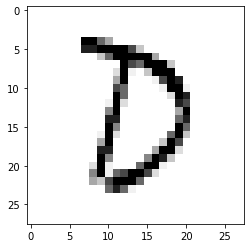

In [11]:
# display sample alphabet
plt.imshow(X.iloc[50000].values.reshape(28,28), cmap='Greys')
plt.show()

# Train and Test Splitting

In [56]:
# Split data into train and test
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.20, random_state=785)

In [62]:
X_train.shape

(297960, 784)

In [72]:
# reshape data for CNN model
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [73]:
X_train.shape

(297960, 28, 28, 1)

In [74]:
X_test.shape

(74490, 28, 28, 1)

In [75]:
# normalixe data
X_train = X_train / 255
X_test = X_test / 255

In [79]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

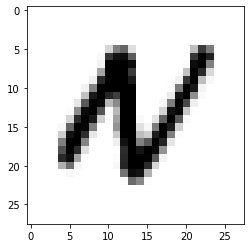

In [89]:
plt.imshow(X_train[1500].reshape(28,28), cmap='Greys')
plt.show()

In [88]:
y_train[1500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [90]:
# total number of classes
num_classes = y_test.shape[1]

In [92]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [93]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 297960 samples, validate on 74490 samples
Epoch 1/10
 - 20s - loss: 0.2278 - accuracy: 0.9373 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 2/10
 - 18s - loss: 0.0822 - accuracy: 0.9772 - val_loss: 0.0675 - val_accuracy: 0.9812
Epoch 3/10
 - 18s - loss: 0.0611 - accuracy: 0.9824 - val_loss: 0.0544 - val_accuracy: 0.9854
Epoch 4/10
 - 18s - loss: 0.0492 - accuracy: 0.9857 - val_loss: 0.0490 - val_accuracy: 0.9865
Epoch 5/10
 - 18s - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.0434 - val_accuracy: 0.9881
Epoch 6/10
 - 18s - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0388 - val_accuracy: 0.9894
Epoch 7/10
 - 18s - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0370 - val_accuracy: 0.9906
Epoch 8/10
 - 18s - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0332 - val_accuracy: 0.9914
Epoch 9/10
 - 18s - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.0330 - val_accuracy: 0.9913
Epoch 10/10
 - 18s - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0306 - val_accuracy: 0.9919


In [95]:
# Final evaluation of the model
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.81%


In [96]:
#save the trained weights
model.save('weights.model')

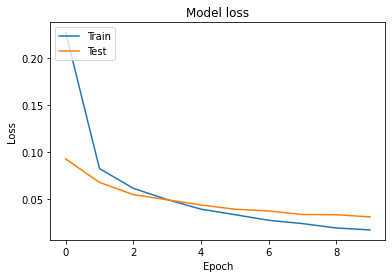

In [97]:
# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

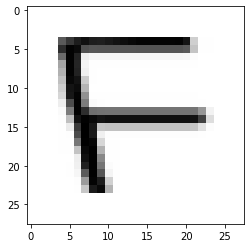

In [118]:
plt.imshow(X_test[5].reshape(28,28), cmap='Greys')
plt.show()

In [119]:
# prediction for a sample
np.argmax(max(model.predict(X_test[5].reshape(1,28,28,1))))

5